# Company Stock Data Analysis

This notebook performs comprehensive data analysis on individual company stock data from KSE100/KSE30 datasets.

## Features:
- Load company-specific sheet data from Excel files
- Statistical summary and data quality checks
- Time series analysis
- Price and volume analysis
- Trend visualization
- Technical indicators (Moving Averages, Volatility)
- Returns analysis

## 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!


## 2. Configuration - Set File Path and Company Symbol

**Instructions:**
- Set `FILE_PATH` to the Excel file in `work/4_separate_companies/merge_columns/` folder
- Set `COMPANY_SYMBOL` to the company ticker/symbol (sheet name in the Excel file)

Available files:
- `kse100_daily_data_sep_companies.xlsx`
- `kse30_daily_data_sep_companies.xlsx`

In [3]:
# ========== CONFIGURATION ==========
# Set your file path and company symbol here

FILE_PATH = r'e:\Codes\Python\indexfundproject\work\4_separate_companies\merge_columns\kse100_daily_data_sep_companies.xlsx'
COMPANY_SYMBOL = 'OGDC'  # Change this to your desired company symbol

# ===================================

print(f"Configuration:")
print(f"  File: {FILE_PATH}")
print(f"  Company Symbol: {COMPANY_SYMBOL}")

Configuration:
  File: e:\Codes\Python\indexfundproject\work\4_separate_companies\merge_columns\kse100_daily_data_sep_companies.xlsx
  Company Symbol: OGDC


## 3. Load Data

Load the company data from the specified Excel file and sheet.

In [4]:
# Load available sheets
xl_file = pd.ExcelFile(FILE_PATH)
available_sheets = xl_file.sheet_names

print(f"Total sheets in file: {len(available_sheets)}")
print(f"\nFirst 10 available company symbols:")
for i, sheet in enumerate(available_sheets[:10], 1):
    print(f"  {i}. {sheet}")

# Check if company symbol exists
if COMPANY_SYMBOL not in available_sheets:
    print(f"\n❌ ERROR: '{COMPANY_SYMBOL}' not found in the file!")
    print(f"\nAvailable symbols: {', '.join(available_sheets[:20])}...")
else:
    print(f"\n✓ Company symbol '{COMPANY_SYMBOL}' found!")

Total sheets in file: 141

First 10 available company symbols:
  1. ABL
  2. ABOT
  3. AGIL
  4. AGL
  5. AGP
  6. AICL
  7. AIRLINK
  8. AKBL
  9. ANL
  10. APL

✓ Company symbol 'OGDC' found!


In [5]:
# Load the company data
df = pd.read_excel(FILE_PATH, sheet_name=COMPANY_SYMBOL)

print(f"Data loaded successfully for {COMPANY_SYMBOL}!")
print(f"\nDataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns: {list(df.columns)}")

# Display first few rows
print(f"\nFirst 5 rows:")
df.head()

Data loaded successfully for OGDC!

Dataset shape: 1411 rows × 11 columns

Columns: ['Date', 'ISIN', 'SYMBOL', 'COMPANY', 'PRICE', 'IDX WT %', 'FF BASED SHARES', 'FF BASED MCAP', 'ORD SHARES', 'ORD SHARES MCAP', 'VOLUME']

First 5 rows:


,Date,ISIN,SYMBOL,COMPANY,PRICE,IDX WT %,FF BASED SHARES,FF BASED MCAP,ORD SHARES,ORD SHARES MCAP,VOLUME
0,2020-01-01,PK0080201012,OGDC,Oil & Gas Development Company Ltd.,142.92,4.96,645139260,92203303039.2,4300928400,614688686928.0,784400
1,2020-01-02,PK0080201012,OGDC,Oil & Gas Development Company Ltd.,147.16,4.98,645139260,94938693501.6,4300928400,632924623344.0,4383500
2,2020-01-03,PK0080201012,OGDC,Oil & Gas Development Company Ltd.,149.48,5.07,645139260,96435416584.8,4300928400,642902777232.0,4018800
3,2020-01-06,PK0080201012,OGDC,Oil & Gas Development Company Ltd.,148.56,5.17,645139260,95841888465.6,4300928400,638945923104.0,3992300
4,2020-01-07,PK0080201012,OGDC,Oil & Gas Development Company Ltd.,149.01,5.11,645139260,96132201132.6,4300928400,640881340884.0,2355100


## 4. Data Cleaning and Preprocessing

In [6]:
# Make a copy for processing
data = df.copy()

# Convert Date column to datetime if it exists
date_columns = [col for col in data.columns if 'date' in col.lower()]
if date_columns:
    data[date_columns[0]] = pd.to_datetime(data[date_columns[0]])
    data = data.sort_values(by=date_columns[0]).reset_index(drop=True)
    print(f"✓ Date column '{date_columns[0]}' converted to datetime and sorted")

# Check for missing values
missing_values = data.isnull().sum()
missing_pct = (missing_values / len(data)) * 100

print(f"\nMissing Values Analysis:")
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing %': missing_pct.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("  ✓ No missing values found!")

# Data types
print(f"\nData Types:")
print(data.dtypes)

✓ Date column 'Date' converted to datetime and sorted

Missing Values Analysis:
  ✓ No missing values found!

Data Types:
Date               datetime64[ns]
ISIN                       object
SYMBOL                     object
COMPANY                    object
PRICE                     float64
IDX WT %                  float64
FF BASED SHARES            object
FF BASED MCAP              object
ORD SHARES                 object
ORD SHARES MCAP            object
VOLUME                      int64
dtype: object


## 5. Statistical Summary

In [7]:
# Identify numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

print(f"Statistical Summary for {COMPANY_SYMBOL}:")
print("="*80)

if numeric_cols:
    summary = data[numeric_cols].describe()
    display(summary)
    
    # Additional statistics
    print("\nAdditional Statistics:")
    for col in numeric_cols:
        print(f"\n{col}:")
        print(f"  Median: {data[col].median():.2f}")
        print(f"  Skewness: {data[col].skew():.2f}")
        print(f"  Kurtosis: {data[col].kurtosis():.2f}")
else:
    print("No numeric columns found.")

Statistical Summary for OGDC:


,PRICE,IDX WT %,VOLUME
count,1411.000000,1411.000000,1.411000e+03
mean,121.242481,3.596429,5.248529e+06
std,49.842416,0.527402,5.744400e+06
min,69.770000,0.000000,1.075750e+05
25%,86.215000,3.160000,1.792750e+06
50%,101.840000,3.620000,3.403901e+06
75%,133.535000,3.862572,6.281210e+06
max,282.860000,5.170000,5.294712e+07



Additional Statistics:

PRICE:
  Median: 101.84
  Skewness: 1.46
  Kurtosis: 1.18

IDX WT %:
  Median: 3.62
  Skewness: -0.46
  Kurtosis: 5.41

VOLUME:
  Median: 3403901.00
  Skewness: 2.98
  Kurtosis: 12.96
  Median: 101.84
  Skewness: 1.46
  Kurtosis: 1.18

IDX WT %:
  Median: 3.62
  Skewness: -0.46
  Kurtosis: 5.41

VOLUME:
  Median: 3403901.00
  Skewness: 2.98
  Kurtosis: 12.96


## 6. Price Analysis

Analyze price movements (Open, High, Low, Close)

In [8]:
# Identify price columns
price_cols = [col for col in data.columns if any(x in col.upper() for x in ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'PRICE'])]

print(f"Price Columns Found: {price_cols}")

if price_cols:
    # Price range analysis
    print(f"\nPrice Range Analysis:")
    for col in price_cols:
        if col in data.columns:
            print(f"\n{col}:")
            print(f"  Min: {data[col].min():.2f}")
            print(f"  Max: {data[col].max():.2f}")
            print(f"  Range: {data[col].max() - data[col].min():.2f}")
            print(f"  Mean: {data[col].mean():.2f}")
            print(f"  Std Dev: {data[col].std():.2f}")
            print(f"  CV (Coefficient of Variation): {(data[col].std() / data[col].mean() * 100):.2f}%")

Price Columns Found: ['PRICE']

Price Range Analysis:

PRICE:
  Min: 69.77
  Max: 282.86
  Range: 213.09
  Mean: 121.24
  Std Dev: 49.84
  CV (Coefficient of Variation): 41.11%


## 7. Volume Analysis

In [9]:
# Find volume column
volume_cols = [col for col in data.columns if 'VOLUME' in col.upper()]

if volume_cols:
    volume_col = volume_cols[0]
    print(f"Volume Analysis for '{volume_col}':")
    print("="*80)
    
    print(f"Total Volume: {data[volume_col].sum():,.0f}")
    print(f"Average Daily Volume: {data[volume_col].mean():,.0f}")
    print(f"Median Daily Volume: {data[volume_col].median():,.0f}")
    print(f"Max Daily Volume: {data[volume_col].max():,.0f}")
    print(f"Min Daily Volume: {data[volume_col].min():,.0f}")
    print(f"Std Dev: {data[volume_col].std():,.0f}")
    
    # Volume quartiles
    print(f"\nVolume Quartiles:")
    quartiles = data[volume_col].quantile([0.25, 0.5, 0.75])
    print(f"  25th percentile: {quartiles[0.25]:,.0f}")
    print(f"  50th percentile (Median): {quartiles[0.5]:,.0f}")
    print(f"  75th percentile: {quartiles[0.75]:,.0f}")
else:
    print("No volume column found in the data.")

Volume Analysis for 'VOLUME':
Total Volume: 7,405,674,341
Average Daily Volume: 5,248,529
Median Daily Volume: 3,403,901
Max Daily Volume: 52,947,125
Min Daily Volume: 107,575
Std Dev: 5,744,400

Volume Quartiles:
  25th percentile: 1,792,750
  50th percentile (Median): 3,403,901
  75th percentile: 6,281,210


## 8. Time Series Visualization

Plot price and volume trends over time

In [10]:
# Check if we have date and price columns
if date_columns and price_cols:
    date_col = date_columns[0]
    
    # Find Close price column
    close_cols = [col for col in price_cols if 'CLOSE' in col.upper()]
    
    if close_cols:
        close_col = close_cols[0]
        
        # Create figure with subplots
        fig, axes = plt.subplots(2, 1, figsize=(15, 10))
        
        # Plot 1: Price over time
        axes[0].plot(data[date_col], data[close_col], linewidth=2, color='#2E86AB')
        axes[0].set_title(f'{COMPANY_SYMBOL} - Close Price Over Time', fontsize=16, fontweight='bold')
        axes[0].set_xlabel('Date', fontsize=12)
        axes[0].set_ylabel('Close Price', fontsize=12)
        axes[0].grid(True, alpha=0.3)
        axes[0].tick_params(axis='x', rotation=45)
        
        # Plot 2: Volume over time
        if volume_cols:
            volume_col = volume_cols[0]
            axes[1].bar(data[date_col], data[volume_col], color='#A23B72', alpha=0.6)
            axes[1].set_title(f'{COMPANY_SYMBOL} - Trading Volume Over Time', fontsize=16, fontweight='bold')
            axes[1].set_xlabel('Date', fontsize=12)
            axes[1].set_ylabel('Volume', fontsize=12)
            axes[1].grid(True, alpha=0.3)
            axes[1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No Close price column found.")
else:
    print("Missing date or price columns for visualization.")

No Close price column found.


## 9. OHLC Chart (Candlestick Style)

In [11]:
# Check for OHLC columns
ohlc_map = {}
for col in data.columns:
    col_upper = col.upper()
    if 'OPEN' in col_upper:
        ohlc_map['Open'] = col
    elif 'HIGH' in col_upper:
        ohlc_map['High'] = col
    elif 'LOW' in col_upper:
        ohlc_map['Low'] = col
    elif 'CLOSE' in col_upper:
        ohlc_map['Close'] = col

if len(ohlc_map) == 4 and date_columns:
    date_col = date_columns[0]
    
    # Create OHLC visualization
    fig, ax = plt.subplots(figsize=(15, 7))
    
    # Plot High-Low range as vertical lines
    for idx in range(len(data)):
        date = data[date_col].iloc[idx]
        open_price = data[ohlc_map['Open']].iloc[idx]
        high = data[ohlc_map['High']].iloc[idx]
        low = data[ohlc_map['Low']].iloc[idx]
        close = data[ohlc_map['Close']].iloc[idx]
        
        # Color: green if close > open, red otherwise
        color = 'green' if close >= open_price else 'red'
        
        # High-Low line
        ax.plot([date, date], [low, high], color=color, linewidth=0.5, alpha=0.8)
        
        # Open-Close box
        height = abs(close - open_price)
        bottom = min(open_price, close)
        ax.bar(date, height, bottom=bottom, width=0.8, color=color, alpha=0.6)
    
    ax.set_title(f'{COMPANY_SYMBOL} - OHLC Chart', fontsize=16, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price', fontsize=12)
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("Note: Green indicates closing price higher than opening price")
    print("      Red indicates closing price lower than opening price")
else:
    print(f"Cannot create OHLC chart. Found columns: {list(ohlc_map.keys())}")
    print("Required: Open, High, Low, Close")

Cannot create OHLC chart. Found columns: []
Required: Open, High, Low, Close


## 10. Returns Analysis

Calculate and analyze daily returns

In [12]:
# Calculate returns if Close price exists
if 'Close' in ohlc_map and date_columns:
    close_col = ohlc_map['Close']
    
    # Daily returns (percentage change)
    data['Daily_Return'] = data[close_col].pct_change() * 100
    
    # Log returns
    data['Log_Return'] = np.log(data[close_col] / data[close_col].shift(1)) * 100
    
    print(f"Returns Analysis for {COMPANY_SYMBOL}:")
    print("="*80)
    
    # Drop NaN from returns
    returns = data['Daily_Return'].dropna()
    
    print(f"\nDaily Returns Statistics:")
    print(f"  Mean Daily Return: {returns.mean():.4f}%")
    print(f"  Median Daily Return: {returns.median():.4f}%")
    print(f"  Std Dev (Volatility): {returns.std():.4f}%")
    print(f"  Min Daily Return: {returns.min():.4f}%")
    print(f"  Max Daily Return: {returns.max():.4f}%")
    print(f"  Sharpe Ratio (assuming 0% risk-free rate): {returns.mean() / returns.std():.4f}")
    
    # Positive vs Negative days
    positive_days = (returns > 0).sum()
    negative_days = (returns < 0).sum()
    neutral_days = (returns == 0).sum()
    
    print(f"\nTrading Days Analysis:")
    print(f"  Positive Days: {positive_days} ({positive_days/len(returns)*100:.2f}%)")
    print(f"  Negative Days: {negative_days} ({negative_days/len(returns)*100:.2f}%)")
    print(f"  Neutral Days: {neutral_days} ({neutral_days/len(returns)*100:.2f}%)")
    
    # Annualized metrics (assuming 252 trading days)
    annualized_return = returns.mean() * 252
    annualized_volatility = returns.std() * np.sqrt(252)
    
    print(f"\nAnnualized Metrics (252 trading days):")
    print(f"  Annualized Return: {annualized_return:.2f}%")
    print(f"  Annualized Volatility: {annualized_volatility:.2f}%")
    
else:
    print("Cannot calculate returns - Close price column not found.")

Cannot calculate returns - Close price column not found.


## 11. Returns Distribution

In [13]:
# Visualize returns distribution
if 'Daily_Return' in data.columns:
    returns = data['Daily_Return'].dropna()
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    axes[0].hist(returns, bins=50, color='#06A77D', alpha=0.7, edgecolor='black')
    axes[0].axvline(returns.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {returns.mean():.4f}%')
    axes[0].axvline(returns.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {returns.median():.4f}%')
    axes[0].set_title(f'{COMPANY_SYMBOL} - Daily Returns Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Daily Return (%)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Box plot
    axes[1].boxplot(returns, vert=True)
    axes[1].set_title(f'{COMPANY_SYMBOL} - Returns Box Plot', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Daily Return (%)', fontsize=12)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 12. Moving Averages

Calculate and visualize moving averages (MA)

In [14]:
# Calculate moving averages
if 'Close' in ohlc_map and date_columns:
    close_col = ohlc_map['Close']
    date_col = date_columns[0]
    
    # Calculate MAs
    data['MA_7'] = data[close_col].rolling(window=7).mean()
    data['MA_30'] = data[close_col].rolling(window=30).mean()
    data['MA_90'] = data[close_col].rolling(window=90).mean()
    
    # Plot
    plt.figure(figsize=(15, 7))
    plt.plot(data[date_col], data[close_col], label='Close Price', linewidth=2, alpha=0.7)
    plt.plot(data[date_col], data['MA_7'], label='7-Day MA', linewidth=2, linestyle='--')
    plt.plot(data[date_col], data['MA_30'], label='30-Day MA', linewidth=2, linestyle='--')
    plt.plot(data[date_col], data['MA_90'], label='90-Day MA', linewidth=2, linestyle='--')
    
    plt.title(f'{COMPANY_SYMBOL} - Price with Moving Averages', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.legend(loc='best', fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print(f"Moving averages calculated:")
    print(f"  Current Close Price: {data[close_col].iloc[-1]:.2f}")
    print(f"  7-Day MA: {data['MA_7'].iloc[-1]:.2f}")
    print(f"  30-Day MA: {data['MA_30'].iloc[-1]:.2f}")
    print(f"  90-Day MA: {data['MA_90'].iloc[-1]:.2f}")

## 13. Volatility Analysis

Calculate rolling volatility (standard deviation of returns)

In [15]:
# Calculate volatility
if 'Daily_Return' in data.columns and date_columns:
    date_col = date_columns[0]
    
    # Rolling volatility (30-day window)
    data['Volatility_30'] = data['Daily_Return'].rolling(window=30).std()
    
    # Plot
    plt.figure(figsize=(15, 6))
    plt.plot(data[date_col], data['Volatility_30'], linewidth=2, color='#D00000')
    plt.fill_between(data[date_col], data['Volatility_30'], alpha=0.3, color='#D00000')
    plt.title(f'{COMPANY_SYMBOL} - 30-Day Rolling Volatility', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Volatility (Std Dev of Returns)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print(f"Volatility Statistics:")
    vol_data = data['Volatility_30'].dropna()
    print(f"  Current 30-Day Volatility: {vol_data.iloc[-1]:.4f}%")
    print(f"  Average Volatility: {vol_data.mean():.4f}%")
    print(f"  Max Volatility: {vol_data.max():.4f}%")
    print(f"  Min Volatility: {vol_data.min():.4f}%")

## 14. Correlation Heatmap

Visualize correlations between numeric variables

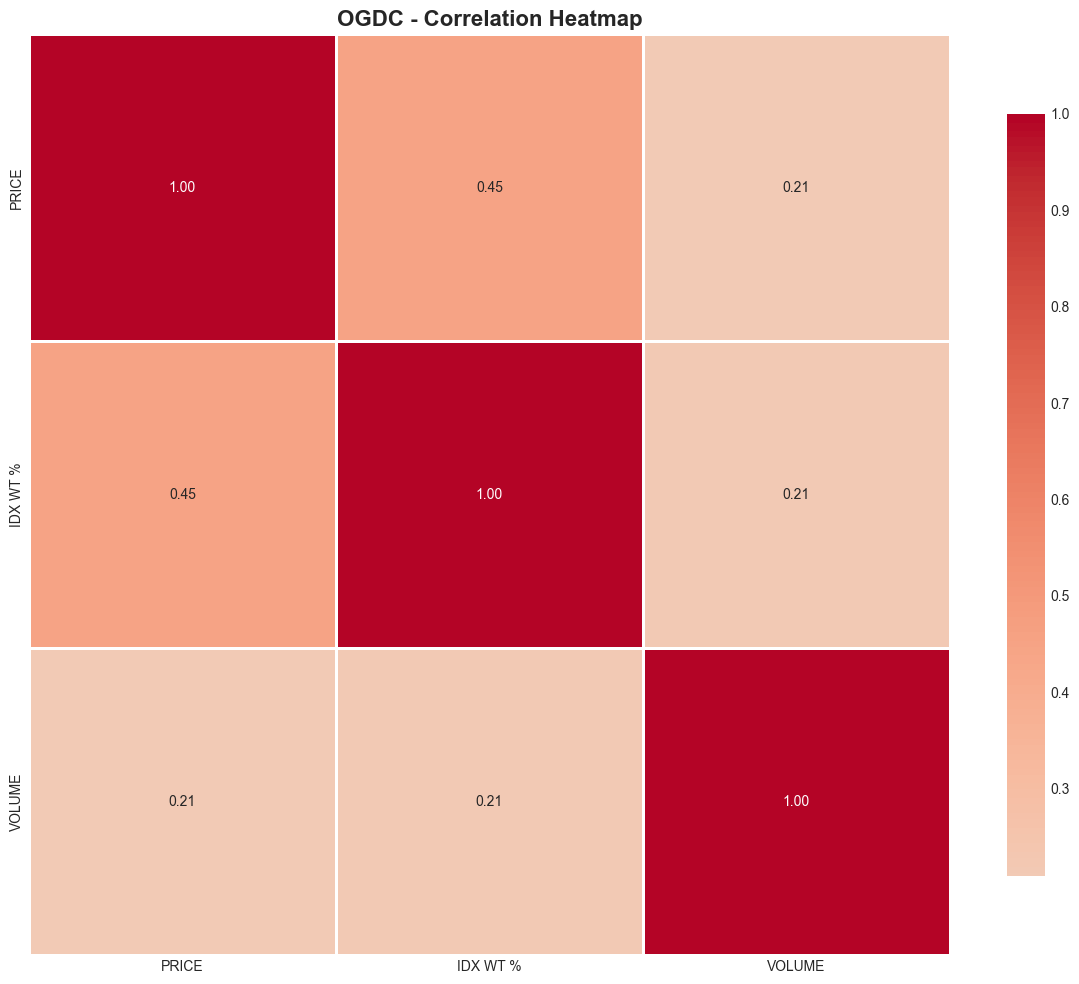

In [16]:
# Correlation analysis
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 1:
    # Calculate correlation matrix
    corr_matrix = data[numeric_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title(f'{COMPANY_SYMBOL} - Correlation Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation analysis.")

## 15. Summary Report

Generate a comprehensive summary of the analysis

In [17]:
print("="*80)
print(f"COMPREHENSIVE ANALYSIS REPORT: {COMPANY_SYMBOL}")
print("="*80)

print(f"\n📊 DATA OVERVIEW:")
print(f"  File: {FILE_PATH.split(chr(92))[-1]}")
print(f"  Total Records: {len(data):,}")
print(f"  Date Range: {data[date_col].min().strftime('%Y-%m-%d')} to {data[date_col].max().strftime('%Y-%m-%d')}")
print(f"  Trading Days: {len(data)}")

if 'Close' in ohlc_map:
    close_col = ohlc_map['Close']
    print(f"\n💰 PRICE SUMMARY:")
    print(f"  Current Price: {data[close_col].iloc[-1]:.2f}")
    print(f"  Starting Price: {data[close_col].iloc[0]:.2f}")
    print(f"  Overall Change: {((data[close_col].iloc[-1] / data[close_col].iloc[0]) - 1) * 100:.2f}%")
    print(f"  Highest Price: {data[close_col].max():.2f}")
    print(f"  Lowest Price: {data[close_col].min():.2f}")
    print(f"  Average Price: {data[close_col].mean():.2f}")

if volume_cols:
    volume_col = volume_cols[0]
    print(f"\n📈 VOLUME SUMMARY:")
    print(f"  Total Volume: {data[volume_col].sum():,.0f}")
    print(f"  Average Daily Volume: {data[volume_col].mean():,.0f}")
    print(f"  Highest Volume Day: {data[volume_col].max():,.0f}")

if 'Daily_Return' in data.columns:
    returns = data['Daily_Return'].dropna()
    print(f"\n📉 RETURNS & RISK:")
    print(f"  Average Daily Return: {returns.mean():.4f}%")
    print(f"  Daily Volatility: {returns.std():.4f}%")
    print(f"  Annualized Return: {returns.mean() * 252:.2f}%")
    print(f"  Annualized Volatility: {returns.std() * np.sqrt(252):.2f}%")
    print(f"  Sharpe Ratio: {returns.mean() / returns.std():.4f}")
    print(f"  Best Day: {returns.max():.2f}%")
    print(f"  Worst Day: {returns.min():.2f}%")

print(f"\n✅ ANALYSIS COMPLETE!")
print("="*80)

COMPREHENSIVE ANALYSIS REPORT: OGDC

📊 DATA OVERVIEW:
  File: kse100_daily_data_sep_companies.xlsx
  Total Records: 1,411
  Date Range: 2020-01-01 to 2025-10-01
  Trading Days: 1411

📈 VOLUME SUMMARY:
  Total Volume: 7,405,674,341
  Average Daily Volume: 5,248,529
  Highest Volume Day: 52,947,125

✅ ANALYSIS COMPLETE!


## 16. Export Analysis Results (Optional)

Save the processed data with calculated metrics to a CSV file

In [18]:
# Uncomment to export
# output_file = f'{COMPANY_SYMBOL}_analysis_{datetime.now().strftime("%Y%m%d")}.csv'
# data.to_csv(output_file, index=False)
# print(f"Analysis results exported to: {output_file}")

print("To export results, uncomment the code above and run this cell.")

To export results, uncomment the code above and run this cell.
